## PREDICCION DEL VALOR DE VENTA DE LAS VIVIENDAS

El archivo vivienda.csv contiene información de los precios de venta de viviendas en Estados Unidos el año 2014. 
Tiene los siguientes campos:
* price: precio al que se vendio la vivienda
* bedrooms: N° de habitaciones
* bathrooms: N° de baños
* sqft_living: Pies cuadrados construidos
* sqft_lot: Pies cuadrados del terreno
* waterfront: si tiene vista al lago
* sqft_basement: Piues cuadrados del subterraneo
* yr_built: Año de construcción
* city: Ciudad 
* country: Pais

In [14]:
import pandas as pd
from plotnine import *
import seaborn as sns

In [15]:
base=pd.read_csv('viviendas.csv')

In [16]:
base.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_basement,yr_built,city,country
0,313000.0,3.0,1.50,1340,7912,0,0,1955,Shoreline,USA
1,2384000.0,5.0,2.50,3650,9050,0,280,1921,Seattle,USA
2,342000.0,3.0,2.00,1930,11947,0,0,1966,Kent,USA
3,420000.0,3.0,2.25,2000,8030,0,1000,1963,Bellevue,USA
4,550000.0,4.0,2.50,1940,10500,0,800,1976,Redmond,USA


## Buscamos NA

In [17]:
base.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
waterfront       0
sqft_basement    0
yr_built         0
city             0
country          0
dtype: int64

## Revisamos las variables

### Variable Country

In [18]:
base['country'].unique()

array(['USA'], dtype=object)

In [19]:
## Country, Solo tiene 1 dato, por lo que no aporta a nuestro modelo. La eliminamos
base=base.drop(columns=['country'], axis=1)
base

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_basement,yr_built,city
0,3.130000e+05,3.0,1.50,1340,7912,0,0,1955,Shoreline
1,2.384000e+06,5.0,2.50,3650,9050,0,280,1921,Seattle
2,3.420000e+05,3.0,2.00,1930,11947,0,0,1966,Kent
3,4.200000e+05,3.0,2.25,2000,8030,0,1000,1963,Bellevue
4,5.500000e+05,4.0,2.50,1940,10500,0,800,1976,Redmond
...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,0,0,1954,Seattle
4596,5.343333e+05,3.0,2.50,1460,7573,0,0,1983,Bellevue
4597,4.169042e+05,3.0,2.50,3010,7014,0,0,2009,Renton
4598,2.034000e+05,4.0,2.00,2090,6630,0,1020,1974,Seattle


### Variable City

### Variables numericas

In [21]:
base.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_basement,yr_built
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,0.007174,312.081522,1970.786304
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.084404,464.137228,29.731848
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,0.000000,0.000000,1900.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,0.000000,0.000000,1951.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,0.000000,0.000000,1976.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,0.000000,610.000000,1997.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,1.000000,4820.000000,2014.000000


## Revisamos la variable sqft_living

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


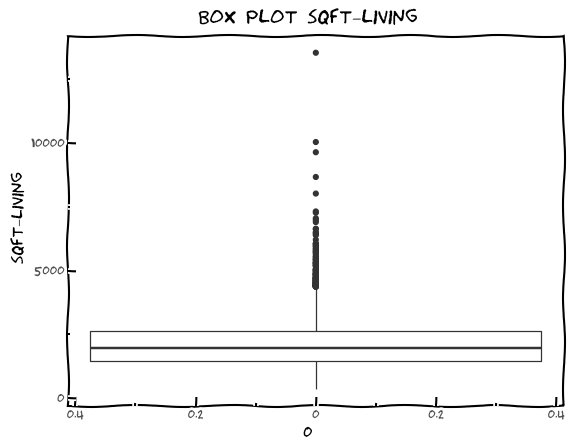

<ggplot: (8774010487789)>

In [22]:
# Boxplot de la variable sqft_living
(ggplot(base)+
aes(x=0,y="sqft_living")+
 geom_boxplot()+
theme_xkcd()+
ggtitle("Box Plot sqft_living")
)

## Eliminamos los Outliers

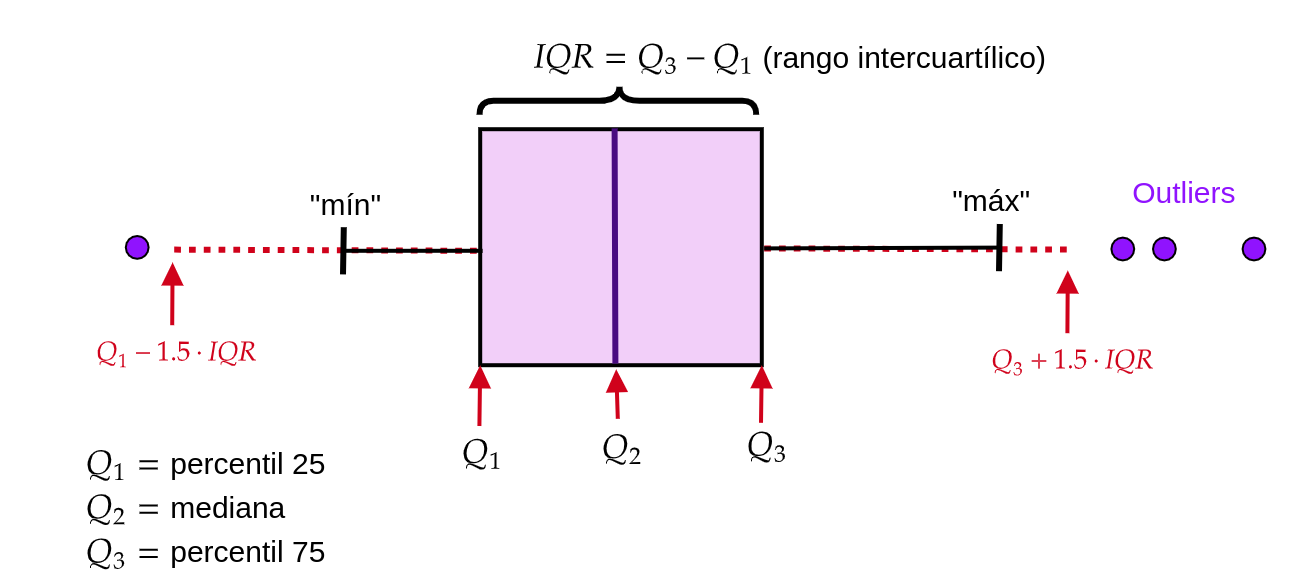

In [23]:
outliers=base['sqft_living'].quantile(0.75)+1.5*(base['sqft_living'].quantile(0.75)-base['sqft_living'].quantile(0.25))
outliers

4360.0

In [30]:
nueva_base=base[base['sqft_living']<4360]

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


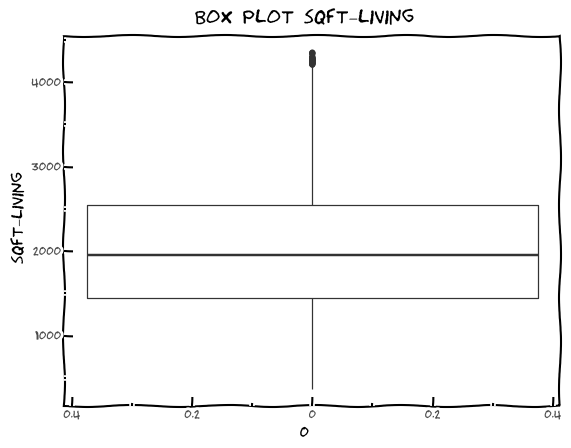

<ggplot: (8773999838061)>

In [32]:
# Boxplot de la variable sqft_living
(ggplot(nueva_base)+
aes(x=0,y="sqft_living")+
 geom_boxplot()+
theme_xkcd()+
ggtitle("Box Plot sqft_living")
)

In [33]:
nueva_base

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_basement,yr_built,city
0,3.130000e+05,3.0,1.50,1340,7912,0,0,1955,Shoreline
1,2.384000e+06,5.0,2.50,3650,9050,0,280,1921,Seattle
2,3.420000e+05,3.0,2.00,1930,11947,0,0,1966,Kent
3,4.200000e+05,3.0,2.25,2000,8030,0,1000,1963,Bellevue
4,5.500000e+05,4.0,2.50,1940,10500,0,800,1976,Redmond
...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,0,0,1954,Seattle
4596,5.343333e+05,3.0,2.50,1460,7573,0,0,1983,Bellevue
4597,4.169042e+05,3.0,2.50,3010,7014,0,0,2009,Renton
4598,2.034000e+05,4.0,2.00,2090,6630,0,1020,1974,Seattle


## Revisamos Price

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


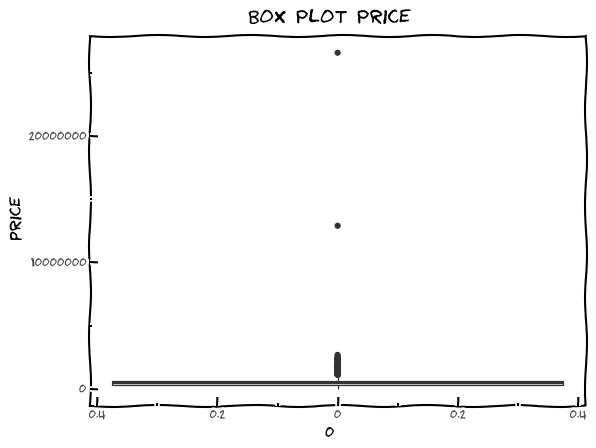

<ggplot: (8773999980365)>

In [34]:
# Boxplot de la variable price
(ggplot(nueva_base)+
aes(x=0,y="price")+
 geom_boxplot()+
theme_xkcd()+
ggtitle("Box Plot Price")
)

In [35]:
outliers_precio=base['price'].quantile(0.75)+1.5*(base['price'].quantile(0.75)-base['price'].quantile(0.25))
outliers_precio

1153093.75

In [37]:
nueva_base=nueva_base[nueva_base['price']<outliers_precio]

In [38]:
nueva_base[nueva_base['price']==0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_basement,yr_built,city
4354,0.0,3.0,1.75,1490,10125,0,0,1962,Federal Way
4356,0.0,4.0,2.75,2600,5390,0,1300,1960,Seattle
4357,0.0,6.0,2.75,3200,9200,0,1600,1953,Burien
4358,0.0,5.0,3.50,3480,36615,0,990,1983,Issaquah
4361,0.0,5.0,1.50,1500,7112,0,740,1920,Burien
4362,0.0,4.0,4.00,3680,18804,0,0,1990,Sammamish
4374,0.0,2.0,2.50,2200,188200,0,0,2007,Enumclaw
4376,0.0,4.0,2.25,2170,10500,0,900,1960,Normandy Park
4386,0.0,4.0,1.50,2180,22870,0,900,1954,Kent
4389,0.0,4.0,3.50,4210,10308,0,0,2006,Bellevue


In [39]:
nueva_base=nueva_base[nueva_base['price']>0]
nueva_base

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_basement,yr_built,city
0,313000.000000,3.0,1.50,1340,7912,0,0,1955,Shoreline
2,342000.000000,3.0,2.00,1930,11947,0,0,1966,Kent
3,420000.000000,3.0,2.25,2000,8030,0,1000,1963,Bellevue
4,550000.000000,4.0,2.50,1940,10500,0,800,1976,Redmond
5,490000.000000,2.0,1.00,880,6380,0,0,1938,Seattle
...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3.0,1.75,1510,6360,0,0,1954,Seattle
4596,534333.333333,3.0,2.50,1460,7573,0,0,1983,Bellevue
4597,416904.166667,3.0,2.50,3010,7014,0,0,2009,Renton
4598,203400.000000,4.0,2.00,2090,6630,0,1020,1974,Seattle


In [40]:
nueva_base.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_basement,yr_built
count,4.262000e+03,4262.000000,4262.000000,4262.000000,4.262000e+03,4262.000000,4262.000000,4262.000000
mean,4.830149e+05,3.340450,2.077722,1997.922337,1.417810e+04,0.003519,277.057954,1970.652745
std,2.115672e+05,0.876163,0.697973,751.335906,3.539328e+04,0.059228,412.258161,29.538530
min,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,0.000000,0.000000,1900.000000
25%,3.190000e+05,3.000000,1.750000,1430.000000,5.000000e+03,0.000000,0.000000,1951.000000
50%,4.480000e+05,3.000000,2.250000,1910.000000,7.536000e+03,0.000000,0.000000,1975.000000
75%,6.096750e+05,4.000000,2.500000,2487.750000,1.050000e+04,0.000000,550.000000,1996.000000
max,1.150000e+06,9.000000,5.750000,4350.000000,1.074218e+06,1.000000,2150.000000,2014.000000


## Boxplot del precio según ciudad

In [41]:
base['city'].unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


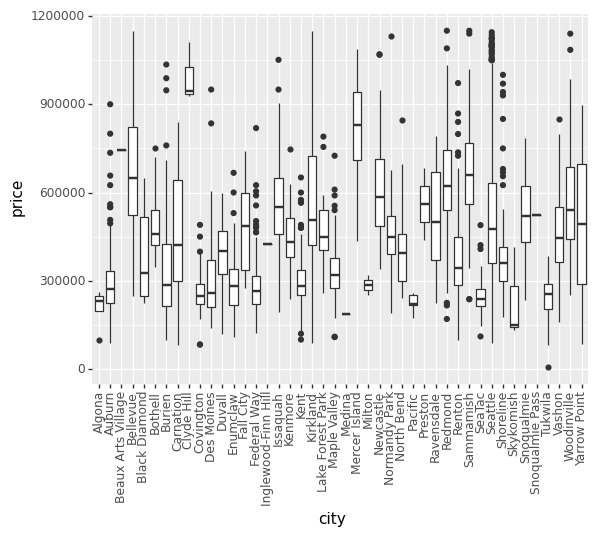

<ggplot: (8773997937753)>

In [44]:

(ggplot(nueva_base)+
aes(x="city",y="price")+
theme(legend_position="bottom",legend_box_spacing=1,axis_text_x=element_text(angle=90))+ #Aca se cambia el ángulo
#theme_xkcd()+
geom_boxplot())

## Boxplot del precio según waterfront

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


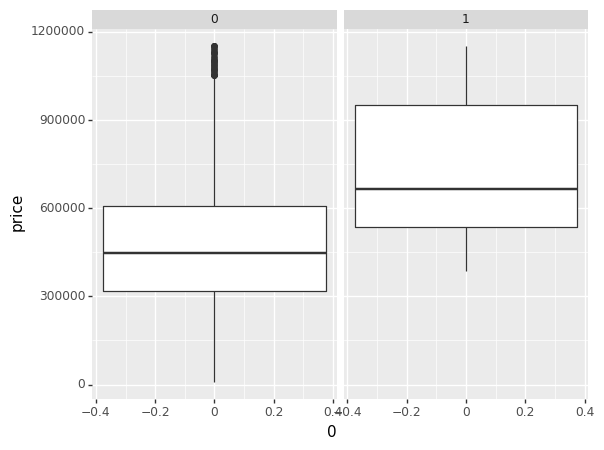

<ggplot: (8774010450925)>

In [45]:
(ggplot(nueva_base)+
aes(x="0",y="price")+
geom_boxplot()+
 facet_wrap("waterfront"))

## sqft_living

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


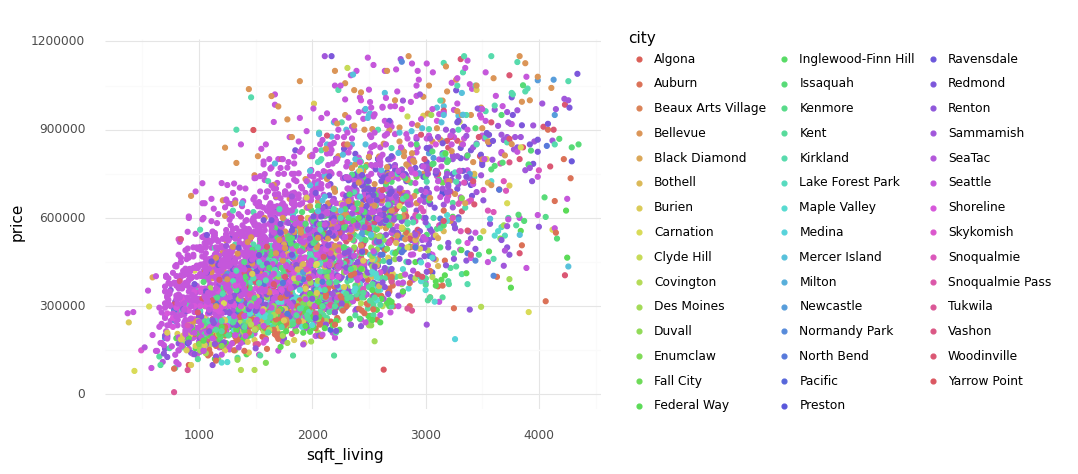

<ggplot: (8773997902317)>

In [46]:
(ggplot(nueva_base)+
aes(x="sqft_living",y="price",color="city")+
geom_point()+
theme_minimal()
)

## sqft_lot

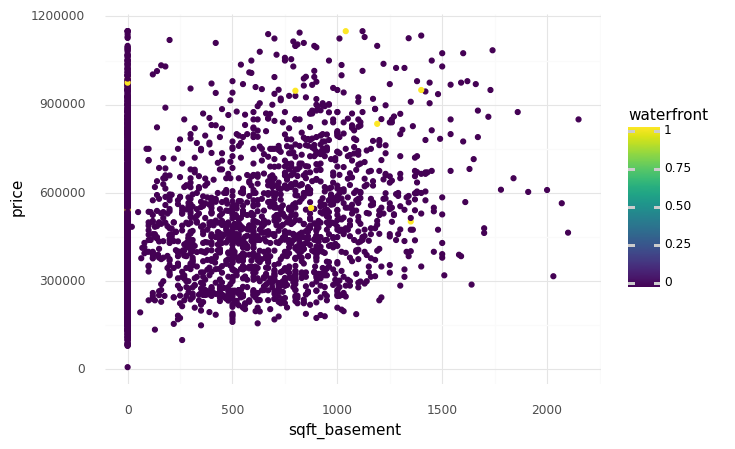

<ggplot: (8773997709917)>

In [47]:
(ggplot(nueva_base)+
aes(x="sqft_basement",y="price",color="waterfront")+
geom_point()+
theme_minimal()
)

## Regresión lineal

In [52]:
X=nueva_base[['bedrooms','bathrooms','sqft_living','sqft_lot','waterfront','sqft_basement','yr_built']]
X

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_basement,yr_built
0,3.0,1.50,1340,7912,0,0,1955
2,3.0,2.00,1930,11947,0,0,1966
3,3.0,2.25,2000,8030,0,1000,1963
4,4.0,2.50,1940,10500,0,800,1976
5,2.0,1.00,880,6380,0,0,1938
...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,0,0,1954
4596,3.0,2.50,1460,7573,0,0,1983
4597,3.0,2.50,3010,7014,0,0,2009
4598,4.0,2.00,2090,6630,0,1020,1974


In [53]:
y=nueva_base['price']
y

0       313000.000000
2       342000.000000
3       420000.000000
4       550000.000000
5       490000.000000
            ...      
4595    308166.666667
4596    534333.333333
4597    416904.166667
4598    203400.000000
4599    220600.000000
Name: price, Length: 4262, dtype: float64

In [54]:
## Separamos en set de entrenamiento y testeo
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
# X_train 
# X_test
# y_train
# y_test 


## Entrenamos nuestro modelo

In [55]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-42100.517510
bathrooms,64956.475256
sqft_living,196.518723
sqft_lot,-0.230645
waterfront,142304.303078
sqft_basement,-40.159112
yr_built,-1993.099731


In [57]:
# El coeficiente de posición
lin_reg.intercept_

4039065.5665449863

In [58]:
y_pred = lin_reg.predict(X_test)
y_pred

array([314386.81946314, 637404.2883381 , 523137.7699501 , ...,
       563818.10508854, 583341.95242833, 475764.55534186])

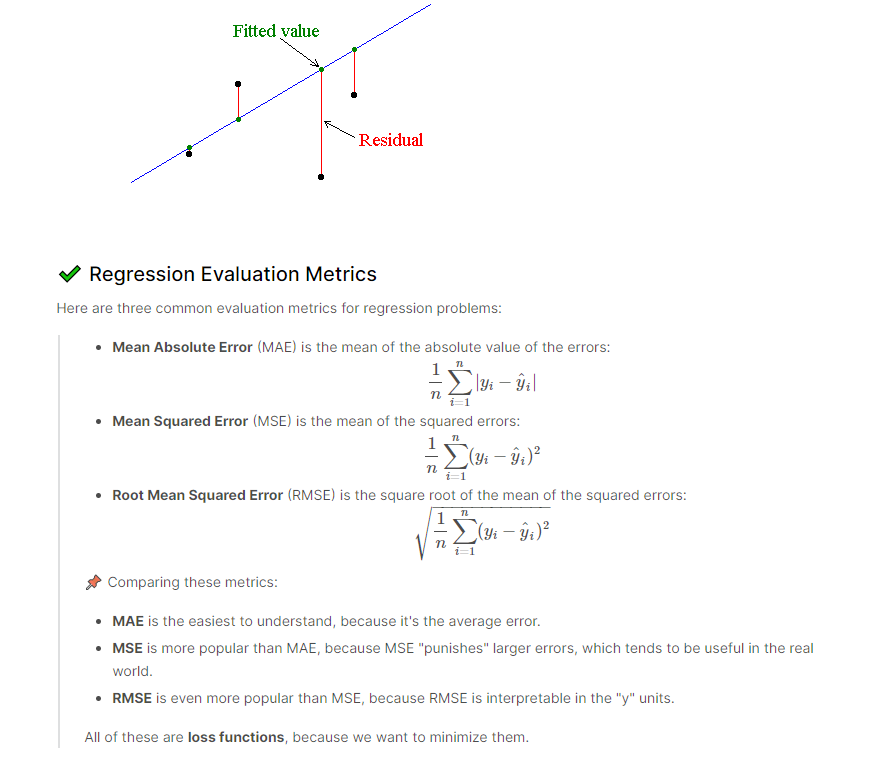

In [59]:
from sklearn.metrics import mean_squared_error
# Ahora calculamos el error medio cuadrado
# El primer parámetro de la función son las respuestas reales
lin_mse = mean_squared_error(y_test, y_pred,squared=True)
lin_rmse = mean_squared_error(y_test, y_pred,squared=False)


In [60]:
import numpy as np
np.sqrt(lin_mse)

163114.94714563282

## Cross Validation

In [61]:
from sklearn.model_selection import cross_val_score

#Instanciamos un modelo
lin_reg = LinearRegression()

In [62]:
scores = cross_val_score(lin_reg, X, y, scoring='neg_mean_squared_error', cv=8)

lin_rmse_scores = np.sqrt(-scores)
lin_rmse_scores

array([150434.78535036, 150071.01389196, 156046.39714752, 152447.30779065,
       156743.61033011, 156543.61271438, 164889.16487806, 174126.14006333])

In [63]:
print("El error es: ",lin_rmse_scores.mean())
print("La desviación estandar del error es: ",lin_rmse_scores.std())

El error es:  157662.75402079694
La desviación estandar del error es:  7624.409275948692


### Probaremos eliminando bedrooms

In [64]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_basement,yr_built
0,3.0,1.50,1340,7912,0,0,1955
2,3.0,2.00,1930,11947,0,0,1966
3,3.0,2.25,2000,8030,0,1000,1963
4,4.0,2.50,1940,10500,0,800,1976
5,2.0,1.00,880,6380,0,0,1938
...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,0,0,1954
4596,3.0,2.50,1460,7573,0,0,1983
4597,3.0,2.50,3010,7014,0,0,2009
4598,4.0,2.00,2090,6630,0,1020,1974


In [65]:
X2=X.drop(columns=['bedrooms'], axis=1)
X2

,bathrooms,sqft_living,sqft_lot,waterfront,sqft_basement,yr_built
0,1.50,1340,7912,0,0,1955
2,2.00,1930,11947,0,0,1966
3,2.25,2000,8030,0,1000,1963
4,2.50,1940,10500,0,800,1976
5,1.00,880,6380,0,0,1938
...,...,...,...,...,...,...
4595,1.75,1510,6360,0,0,1954
4596,2.50,1460,7573,0,0,1983
4597,2.50,3010,7014,0,0,2009
4598,2.00,2090,6630,0,1020,1974


In [66]:
from sklearn.model_selection import cross_val_score

#Instanciamos un modelo
lin_reg2 = LinearRegression()

In [67]:
scores = cross_val_score(lin_reg2, X2, y, scoring='neg_mean_squared_error', cv=8)

lin_rmse_scores = np.sqrt(-scores)
lin_rmse_scores

array([153735.07530291, 152809.29450395, 157282.19032585, 154300.33577901,
       158387.65455957, 159072.89725738, 168043.84122685, 174751.4024663 ])

In [68]:
print("El error es: ",lin_rmse_scores.mean())
print("La desviación estandar del error es: ",lin_rmse_scores.std())

El error es:  159797.8364277261
La desviación estandar del error es:  7213.422051016687


## Probaremos con otro modelo

In [69]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [70]:
test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

In [71]:
from sklearn import metrics
mean_squared_error(y_test, y_pred)

26606485982.322586

In [73]:
import numpy as np
np.sqrt(lin_mse)

163114.94714563282